In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive


In [1]:
drive.mount('/content/drive', force_remount=True)

NameError: ignored

In [ ]:
!ls drive/MyDrive/HCI

ls: cannot access 'drive/MyDrive/HCI': No such file or directory


In [ ]:
# define project root
gdrive_project_root = "drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/"




In [ ]:
# Milot
gdrive_project_root = "drive/MyDrive/01-Education/03-PhD/2021/Courses/HCI/hci_code/"
df = pd.read_csv(gdrive_project_root + '/data/raw/glioma-filtered-combined_study_clinical_data_removed_NAs.csv', delimiter=';')

In [ ]:
df = pd.read_csv(gdrive_project_root + '/data/raw/glioma-filtered-combined_study_clinical_data_removed_NAs.csv', delimiter=';')

In [ ]:
df.head()

,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Diagnosis Age
0,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-110,Mayo-PDX-Sarkaria-110,Glioblastoma Multiforme,161,GBM,25.92,1:DECEASED,1,Primary,Female,Matched,64.0
1,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-118,Mayo-PDX-Sarkaria-118,Glioblastoma Multiforme,79,GBM,24.24,1:DECEASED,1,Primary,Female,Matched,56.0
2,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-122,Mayo-PDX-Sarkaria-122,Glioblastoma Multiforme,77,GBM,13.32,1:DECEASED,1,Primary,Female,Matched,58.0
3,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-125,Mayo-PDX-Sarkaria-125,Glioblastoma Multiforme,75,GBM,19.32,1:DECEASED,1,Primary,Male,Matched,68.0
4,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-126,Mayo-PDX-Sarkaria-126,Glioblastoma Multiforme,160,GBM,17.88,1:DECEASED,1,Primary,Male,Matched,59.0


In [ ]:
print('Total rows: {}, \nTotal columns {}'.format(df.shape[0], df.shape[1]))
print(*df.columns, sep='\n')

Total rows: 736, 
Total columns 13
Study ID
Patient ID
Sample ID
Cancer Type Detailed
Mutation Count
Oncotree Code
Overall Survival (Months)
Overall Survival Status
Number of Samples Per Patient
Sample Type
Sex
Somatic Status
Diagnosis Age


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       736 non-null    object 
 1   Patient ID                     736 non-null    object 
 2   Sample ID                      736 non-null    object 
 3   Cancer Type Detailed           736 non-null    object 
 4   Mutation Count                 736 non-null    int64  
 5   Oncotree Code                  736 non-null    object 
 6   Overall Survival (Months)      736 non-null    float64
 7   Overall Survival Status        734 non-null    object 
 8   Number of Samples Per Patient  736 non-null    int64  
 9   Sample Type                    736 non-null    object 
 10  Sex                            736 non-null    object 
 11  Somatic Status                 736 non-null    object 
 12  Diagnosis Age                  736 non-null    flo

In [ ]:
df.describe()

,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Diagnosis Age
count,736.000000,736.000000,736.000000,736.000000
mean,24.620924,42.373212,1.148098,46.148370
std,60.656827,39.309654,0.602554,14.922257
min,1.000000,0.000000,1.000000,14.000000
25%,5.000000,15.505729,1.000000,34.750000
50%,13.000000,34.408579,1.000000,45.000000
75%,24.250000,58.125000,1.000000,57.000000
max,681.000000,316.730776,7.000000,89.300000


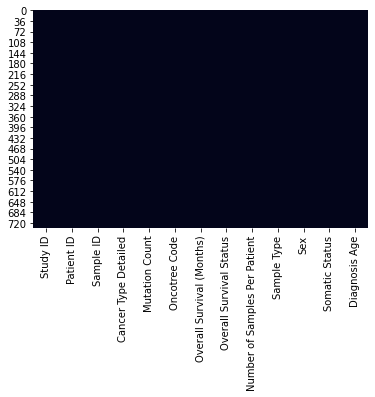

In [ ]:
sns.heatmap(df.isna(), cbar=False)

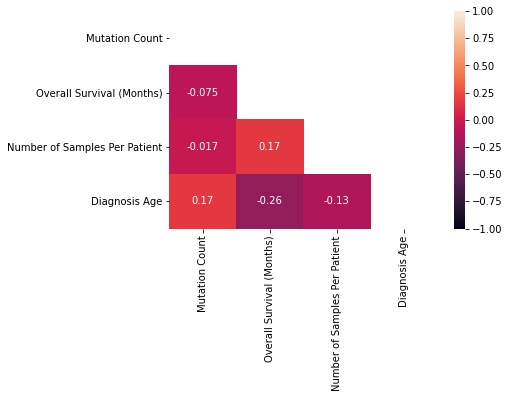

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

In [ ]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type Detailed',
       'Mutation Count', 'Oncotree Code', 'Overall Survival (Months)',
       'Overall Survival Status', 'Number of Samples Per Patient',
       'Sample Type', 'Sex', 'Somatic Status', 'Diagnosis Age'],
      dtype='object')

In [ ]:
print('Number of samples: {}'.format(df.shape[0]))


Number of samples: 736


### Investigate duplicates

In [ ]:
df.shape  

(736, 13)

In [ ]:
df[df.duplicated()]

,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Diagnosis Age


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(736, 13)

In [ ]:
df[df['Patient ID'].duplicated(keep=False)]

,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Diagnosis Age
221,lgg_ucsf_2014,P17,P17_Pri_A,Oligodendroglioma,16,ODG,59.000000,0:LIVING,7,Primary,Male,Matched,27.0
222,lgg_ucsf_2014,P17,P17_Pri_B,Oligodendroglioma,12,ODG,59.000000,0:LIVING,7,Primary,Male,Matched,27.0
223,lgg_ucsf_2014,P17,P17_Pri_C,Oligodendroglioma,12,ODG,59.000000,0:LIVING,7,Primary,Male,Matched,27.0
224,lgg_ucsf_2014,P18,P18_Pri_A,Oligoastrocytoma,50,OAST,106.000000,0:LIVING,5,Primary,Male,Matched,49.0
225,lgg_ucsf_2014,P18,P18_Pri_B,Oligoastrocytoma,45,OAST,106.000000,0:LIVING,5,Primary,Male,Matched,49.0
226,lgg_ucsf_2014,P18,P18_Pri_C,Oligoastrocytoma,56,OAST,106.000000,0:LIVING,5,Primary,Male,Matched,49.0
227,lgg_ucsf_2014,P18,P18_Pri_D,Oligoastrocytoma,49,OAST,106.000000,0:LIVING,5,Primary,Male,Matched,49.0
231,lgg_ucsf_2014,P26,P26_Pri_A,Astrocytoma,20,ASTR,47.000000,0:LIVING,4,Primary,Female,Matched,36.0
232,lgg_ucsf_2014,P26,P26_Pri_B,Astrocytoma,24,ASTR,47.000000,0:LIVING,4,Primary,Female,Matched,36.0
233,lgg_ucsf_2014,P27,P27_Pri_A,Astrocytoma,24,ASTR,54.000000,0:LIVING,4,Primary,Male,Matched,56.0


#### Engineering a new feature from these duplicates. 
---

Patient ID is not unique for every row in the dataset. Some patients have been added more than once. 

From this information, maybe we can assume that some patients have more than one cancer present. From this we can engineer a feature which indicates presence of more than one cancer (1/0). In this way we can remove Patient ID column and treat each entry as different patient with the presence of additional cancer.

TODO: Feedback from @NJ @MG

In [ ]:
len(df['Patient ID'].unique()) # Almost all are unique.. Investigate duplicates 

727

In [ ]:
duplicated_patientids= df.shape[0] - len(df['Patient ID'].unique())
print('Number of non-unique patient id\'s: {}'.format(duplicated_patientids))
print('New feature present in {}% of dataset'.format((duplicated_patientids * 2)/df.shape[0] * 100))
# let's try it out...

Number of non-unique patient id's: 9
New feature present in 2.4456521739130435% of dataset


In [ ]:
df['Additional_cancer'] = 0
df.loc[df['Patient ID'].duplicated(keep=False),'Additional_cancer'] = 1
display(df.head())
display(df[df['Additional_cancer'] == 1].head())

,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Diagnosis Age,Additional_cancer
0,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-110,Mayo-PDX-Sarkaria-110,Glioblastoma Multiforme,161,GBM,25.92,1:DECEASED,1,Primary,Female,Matched,64.0,0
1,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-118,Mayo-PDX-Sarkaria-118,Glioblastoma Multiforme,79,GBM,24.24,1:DECEASED,1,Primary,Female,Matched,56.0,0
2,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-122,Mayo-PDX-Sarkaria-122,Glioblastoma Multiforme,77,GBM,13.32,1:DECEASED,1,Primary,Female,Matched,58.0,0
3,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-125,Mayo-PDX-Sarkaria-125,Glioblastoma Multiforme,75,GBM,19.32,1:DECEASED,1,Primary,Male,Matched,68.0,0
4,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-126,Mayo-PDX-Sarkaria-126,Glioblastoma Multiforme,160,GBM,17.88,1:DECEASED,1,Primary,Male,Matched,59.0,0


,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Diagnosis Age,Additional_cancer
221,lgg_ucsf_2014,P17,P17_Pri_A,Oligodendroglioma,16,ODG,59.0,0:LIVING,7,Primary,Male,Matched,27.0,1
222,lgg_ucsf_2014,P17,P17_Pri_B,Oligodendroglioma,12,ODG,59.0,0:LIVING,7,Primary,Male,Matched,27.0,1
223,lgg_ucsf_2014,P17,P17_Pri_C,Oligodendroglioma,12,ODG,59.0,0:LIVING,7,Primary,Male,Matched,27.0,1
224,lgg_ucsf_2014,P18,P18_Pri_A,Oligoastrocytoma,50,OAST,106.0,0:LIVING,5,Primary,Male,Matched,49.0,1
225,lgg_ucsf_2014,P18,P18_Pri_B,Oligoastrocytoma,45,OAST,106.0,0:LIVING,5,Primary,Male,Matched,49.0,1


#### Removing 'Patient ID' column

In [ ]:
df.drop(['Patient ID'], axis=1, inplace=True)
df.shape

(736, 13)

### Analysis of other columns


In [ ]:
len(df['Sample ID'].unique()) # 736 

736

Removing the Sample ID column as it's completly unique.

In [ ]:
df.drop(['Sample ID'], axis=1, inplace=True)
df.shape

(736, 12)

Study ID column 

In [ ]:
print('Unique Study ID values: {}'.format(len(df['Study ID'].unique())))
print('Unique Study ID values: \n{}'.format(df['Study ID'].unique()))

Unique Study ID values: 6
Unique Study ID values: 
['gbm_mayo_pdx_sarkaria_2019' 'glioma_mskcc_2019' 'lgg_ucsf_2014'
 'gbm_tcga_pub2013' 'lgg_tcga' 'pcpg_tcga']


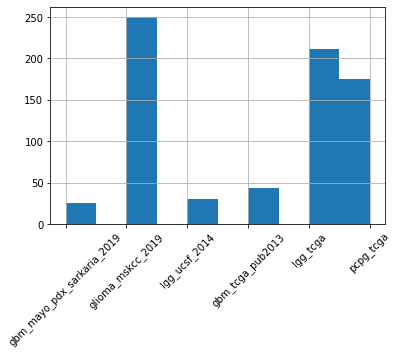

In [ ]:
df['Study ID'].hist(xrot='45', xlabelsize=10)

### Replacing string values - 'Study ID'
---
In the further analysis column 'Study ID' will be encoded as: 
- 'gbm_mayo_pdx_sarkaria_2019' value is encoded as integer value:  1
- 'glioma_mskcc_2019' value is encoded as integer value: 2
- 'lgg_ucsf_2014' value is encoded as integer value: 3
- 'gbm_tcga_pub2013' value is encoded as integer value: 4
- 'lgg_tcga' value is encoded as integer value: 5
- 'pcpg_tcga' value is encoded as integer value: 6

In [ ]:
mapping_study = {
                'gbm_mayo_pdx_sarkaria_2019': 1, 
                'glioma_mskcc_2019': 2,
                'lgg_ucsf_2014': 3,
                'gbm_tcga_pub2013': 4,
                'lgg_tcga': 5,
                'pcpg_tcga': 6
           }
df.replace({'Study ID': mapping_study}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 735
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       736 non-null    int64  
 1   Cancer Type Detailed           736 non-null    object 
 2   Mutation Count                 736 non-null    int64  
 3   Oncotree Code                  736 non-null    object 
 4   Overall Survival (Months)      736 non-null    float64
 5   Overall Survival Status        734 non-null    object 
 6   Number of Samples Per Patient  736 non-null    int64  
 7   Sample Type                    736 non-null    object 
 8   Sex                            736 non-null    object 
 9   Somatic Status                 736 non-null    object 
 10  Diagnosis Age                  736 non-null    float64
 11  Additional_cancer              736 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 7

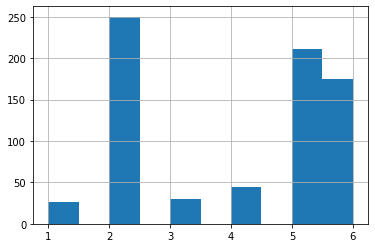

In [ ]:
df['Study ID'].hist()

### Cancer Type Detailed

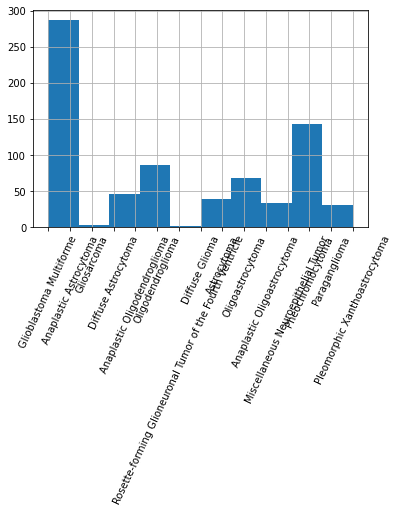

In [ ]:
df['Cancer Type Detailed'].hist(xrot=65)

In [ ]:
ratios_df = df.groupby('Cancer Type Detailed').count().rename(columns={'Study ID': 'Count'})
ratios_df['% total'] = (ratios_df['Count'] / df.shape[0]) * 100
ratios_df[['Count', '% total']].sort_values(by='% total', ascending=False)

,Count,% total
Cancer Type Detailed,,
Glioblastoma Multiforme,182,24.728261
Pheochromocytoma,143,19.429348
Anaplastic Astrocytoma,105,14.266304
Oligodendroglioma,86,11.684783
Oligoastrocytoma,68,9.239130
Astrocytoma,37,5.027174
Anaplastic Oligoastrocytoma,30,4.076087
Paraganglioma,29,3.940217
Diffuse Astrocytoma,25,3.396739


### Removing 'Cancer Type Detailed' column
---
Doesn't make sense to have it as it's our target value

In [ ]:
df.drop(['Cancer Type Detailed'], axis=1, inplace=True)
df.shape

(736, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 735
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       736 non-null    int64  
 1   Mutation Count                 736 non-null    int64  
 2   Oncotree Code                  736 non-null    object 
 3   Overall Survival (Months)      736 non-null    float64
 4   Overall Survival Status        734 non-null    object 
 5   Number of Samples Per Patient  736 non-null    int64  
 6   Sample Type                    736 non-null    object 
 7   Sex                            736 non-null    object 
 8   Somatic Status                 736 non-null    object 
 9   Diagnosis Age                  736 non-null    float64
 10  Additional_cancer              736 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 69.0+ KB


### Overall Survival Status

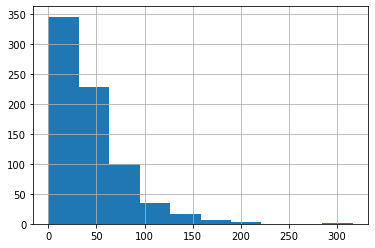

In [ ]:
df['Overall Survival (Months)'].hist()

In [ ]:
df['Overall Survival Status'].unique() # lets investigate NaNs

array(['1:DECEASED', '0:LIVING', nan], dtype=object)

In [ ]:
df[df['Overall Survival Status'].isna()]

,Study ID,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Diagnosis Age,Additional_cancer
208,3,24,OAST,5.0,NaN,2,Primary,Female,Matched,26.0,0
262,4,42,GBM,0.0,NaN,1,Primary,Male,Matched,65.1,0


In [ ]:
df[df.isna().any(axis=1)] # in the whole dataset only these two rows have NaN values

,Study ID,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Diagnosis Age,Additional_cancer
208,3,24,OAST,5.0,NaN,2,Primary,Female,Matched,26.0,0
262,4,42,GBM,0.0,NaN,1,Primary,Male,Matched,65.1,0


In [ ]:
# removing missign values
df.dropna(axis=0, inplace=True)
df.shape

(734, 11)

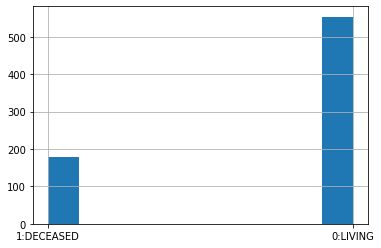

In [ ]:
df['Overall Survival Status'].hist()

### Replacing string values - 'Overall survival Status'
---
In the further analysis column 'Overall survival Status' will contain values: 
 - 1 - which replaces string value: 1:DECEASED
 - 0 - which replaces string value: 0:LIVING

In [ ]:
mapping = {'1:DECEASED': 1, '0:LIVING': 0}
df.replace({'Overall Survival Status': mapping}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 735
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       734 non-null    int64  
 1   Mutation Count                 734 non-null    int64  
 2   Oncotree Code                  734 non-null    object 
 3   Overall Survival (Months)      734 non-null    float64
 4   Overall Survival Status        734 non-null    int64  
 5   Number of Samples Per Patient  734 non-null    int64  
 6   Sample Type                    734 non-null    object 
 7   Sex                            734 non-null    object 
 8   Somatic Status                 734 non-null    object 
 9   Diagnosis Age                  734 non-null    float64
 10  Additional_cancer              734 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 68.8+ KB


In [ ]:
df['Number of Samples Per Patient']

0      1
1      1
2      1
3      1
4      1
      ..
731    1
732    1
733    1
734    1
735    2
Name: Number of Samples Per Patient, Length: 734, dtype: int64

In [ ]:
df['Number of Samples Per Patient'].unique()

array([1, 2, 3, 4, 7, 5])

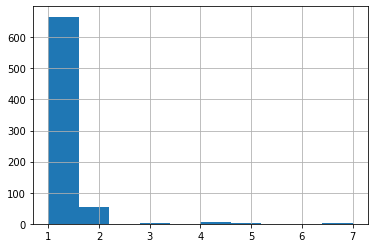

In [ ]:
df['Number of Samples Per Patient'].hist()

In [ ]:
ratios_df = df.groupby('Number of Samples Per Patient').count().rename(columns={'Study ID': 'Count'})
ratios_df['% total'] = (ratios_df['Count'] / df.shape[0]) * 100
ratios_df[['Count', '% total']].sort_values(by='% total', ascending=False)

,Count,% total
Number of Samples Per Patient,,
1,666,90.735695
2,53,7.220708
4,5,0.681199
5,4,0.544959
3,3,0.408719
7,3,0.408719


### Sample Type
---
Sample type column can be removed as it's a constant


In [ ]:
df['Sample Type'].unique()

array(['Primary'], dtype=object)

In [ ]:
# Can be removed as it's a constant
df.drop(['Sample Type'], axis=1, inplace=True)
df.shape

(734, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 735
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       734 non-null    int64  
 1   Mutation Count                 734 non-null    int64  
 2   Oncotree Code                  734 non-null    object 
 3   Overall Survival (Months)      734 non-null    float64
 4   Overall Survival Status        734 non-null    int64  
 5   Number of Samples Per Patient  734 non-null    int64  
 6   Sex                            734 non-null    object 
 7   Somatic Status                 734 non-null    object 
 8   Diagnosis Age                  734 non-null    float64
 9   Additional_cancer              734 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 63.1+ KB


### Column 'Sex'

In [ ]:
df['Sex']

0      Female
1      Female
2      Female
3        Male
4        Male
        ...  
731    Female
732    Female
733    Female
734    Female
735      Male
Name: Sex, Length: 734, dtype: object

In [ ]:
df['Sex'].unique() 

array(['Female', 'Male'], dtype=object)

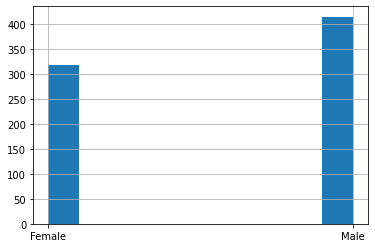

In [ ]:
df['Sex'].hist()

### Replacing string values - 'Sex'
---
In the further analysis column 'Sex' will contain values: 
 - 1 - which replaces string value: 'Female'
 - 0 - which replaces string value: 'Male'

In [ ]:
mapping_sex = {'Female': 1, 'Male': 0} # encoding 'Sex' column to 1/0
df.replace({'Sex': mapping_sex}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 735
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       734 non-null    int64  
 1   Mutation Count                 734 non-null    int64  
 2   Oncotree Code                  734 non-null    object 
 3   Overall Survival (Months)      734 non-null    float64
 4   Overall Survival Status        734 non-null    int64  
 5   Number of Samples Per Patient  734 non-null    int64  
 6   Sex                            734 non-null    int64  
 7   Somatic Status                 734 non-null    object 
 8   Diagnosis Age                  734 non-null    float64
 9   Additional_cancer              734 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 63.1+ KB


### Column Somatic Status

In [ ]:
df['Somatic Status']

0        Matched
1        Matched
2        Matched
3        Matched
4        Matched
         ...    
731    Unmatched
732    Unmatched
733    Unmatched
734    Unmatched
735    Unmatched
Name: Somatic Status, Length: 734, dtype: object

In [ ]:
df['Somatic Status'].unique()

array(['Matched', 'Unmatched'], dtype=object)

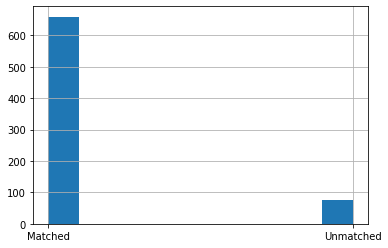

In [ ]:
df['Somatic Status'].hist()

In [ ]:
print('N-Rows with Unmached somatic status {}\nwhich is in percentage {}%'.format(len(df[df['Somatic Status'] == 'Unmatched']), len(df[df['Somatic Status'] == 'Unmatched']) /df.shape[0] * 100))

N-Rows with Unmached somatic status 75
which is in percentage 10.217983651226158%


In [ ]:
mapping_ss = {'Matched': 1, 'Unmatched': 0} # encoding 'Somatic Status' column to 1/0
df.replace({'Somatic Status': mapping_ss}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 735
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       734 non-null    int64  
 1   Mutation Count                 734 non-null    int64  
 2   Oncotree Code                  734 non-null    object 
 3   Overall Survival (Months)      734 non-null    float64
 4   Overall Survival Status        734 non-null    int64  
 5   Number of Samples Per Patient  734 non-null    int64  
 6   Sex                            734 non-null    int64  
 7   Somatic Status                 734 non-null    int64  
 8   Diagnosis Age                  734 non-null    float64
 9   Additional_cancer              734 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 63.1+ KB


### Diagnosis Age column

In [ ]:
df['Diagnosis Age']

0      64.0
1      56.0
2      58.0
3      68.0
4      59.0
       ... 
731    71.0
732    50.0
733    36.0
734    55.0
735    38.0
Name: Diagnosis Age, Length: 734, dtype: float64

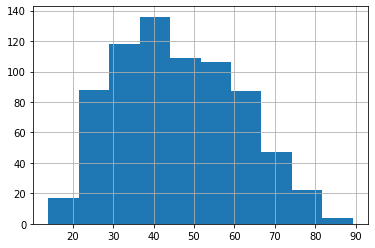

In [ ]:
df['Diagnosis Age'].hist()

In [ ]:
bins = [0, 18, 70, +np.inf]
labels = [1,2,3]
df['Age Group'] = pd.cut(df['Diagnosis Age'], bins=bins, labels=labels)
df['Age Group'] = df['Age Group'].cat.codes # transforming from type Category to int
df[['Diagnosis Age', 'Age Group']].sort_values(by='Diagnosis Age')

,Diagnosis Age,Age Group
420,14.0,0
302,17.0,0
419,18.0,0
622,19.0,1
193,19.0,1
...,...,...
111,81.0,2
648,82.0,2
637,83.0,2
276,88.6,2


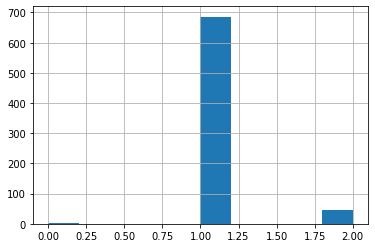

In [ ]:
df['Age Group'].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 735
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       734 non-null    int64  
 1   Mutation Count                 734 non-null    int64  
 2   Oncotree Code                  734 non-null    object 
 3   Overall Survival (Months)      734 non-null    float64
 4   Overall Survival Status        734 non-null    int64  
 5   Number of Samples Per Patient  734 non-null    int64  
 6   Sex                            734 non-null    int64  
 7   Somatic Status                 734 non-null    int64  
 8   Diagnosis Age                  734 non-null    float64
 9   Additional_cancer              734 non-null    int64  
 10  Age Group                      734 non-null    int8   
dtypes: float64(2), int64(7), int8(1), object(1)
memory usage: 63.8+ KB


### Analysis and encoding of the target value (Oncotree Code)
---
In the further analysis column 'Oncotree Code' will be encoded as: 
- 'GBM' value is encoded as integer value:  1
- 'AASTR' value is encoded as integer value: 2
- 'GSARC' value is encoded as integer value: 3
- 'DASTR' value is encoded as integer value: 4
- 'AODG' value is encoded as integer value: 5
- 'ODG' value is encoded as integer value: 6
- 'RGNT' value is encoded as integer value: 7 
- 'DIFG' value is encoded as integer value: 8
- 'ASTR' value is encoded as integer value: 9
- 'OAST' value is encoded as integer value: 10
- 'AOAST' value is encoded as integer value: 11
- 'MNET' value is encoded as integer value: 12
- 'PHC' value is encoded as integer value: 13
- 'PGNG' value is encoded as integer value: 14
- 'PXA' value is encoded as integer value: 15

In [ ]:
df['Oncotree Code'].unique()

array(['GBM', 'AASTR', 'GSARC', 'DASTR', 'AODG', 'ODG', 'RGNT', 'DIFG',
       'ASTR', 'OAST', 'AOAST', 'MNET', 'PHC', 'PGNG', 'PXA'],
      dtype=object)

In [ ]:
ratios_df = df.groupby('Oncotree Code').count().rename(columns={'Study ID': 'Count'})
ratios_df['% total'] = (ratios_df['Count'] / df.shape[0]) * 100
ratios_df[['Count', '% total']].sort_values(by='% total', ascending=False)

,Count,% total
Oncotree Code,,
GBM,181,24.659401
PHC,143,19.482289
AASTR,105,14.305177
ODG,86,11.716621
OAST,67,9.128065
ASTR,37,5.040872
AOAST,30,4.087193
PGNG,29,3.950954
DASTR,25,3.405995


In [ ]:
'''
First we are going to encode all classes uniquely i.e. every class has unique integer encoding

'''

mapping_oc = {
              'GBM':  1,
              'AASTR': 2,
              'GSARC': 3,
              'DASTR': 4,
              'AODG': 5,
              'ODG': 6,
              'RGNT': 7, 
              'DIFG': 8,
              'ASTR': 9,
              'OAST': 10,
              'AOAST': 11,
              'MNET': 12,
              'PHC': 13,
              'PGNG': 14,
              'PXA': 15
              } 

df.replace({'Oncotree Code': mapping_oc}).to_csv(gdrive_project_root + 'data/processed/cancer_data_preprocessed.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 735
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       734 non-null    int64  
 1   Mutation Count                 734 non-null    int64  
 2   Oncotree Code                  734 non-null    int64  
 3   Overall Survival (Months)      734 non-null    float64
 4   Overall Survival Status        734 non-null    int64  
 5   Number of Samples Per Patient  734 non-null    int64  
 6   Sex                            734 non-null    int64  
 7   Somatic Status                 734 non-null    int64  
 8   Diagnosis Age                  734 non-null    float64
 9   Additional_cancer              734 non-null    int64  
 10  Age Group                      734 non-null    int8   
dtypes: float64(2), int64(8), int8(1)
memory usage: 63.8 KB


### Encoding of the target value (Oncotree Code)
---
In the further analysis column 'Oncotree Code' will be encoded as: 
- 'GBM': 1,	
- 'PHC': 2,	
- 'AASTR': 3,
- 'ODG': 4,	
- 'OAST': 5,	
- 'ASTR': 6,
- 'AOAST': -1,
- 'PGNG': -1,
- 'DASTR': -1,
- 'AODG': -1,
- 'GSARC': -1,
- 'MNET': -1,
- 'DIFG': -1,
- 'PXA': -1,
- 'RGNT': -1

Thorugh this top 6 classes were encoded with the unique integers and other classes have -1 ("other") encoding. This is done due to classes such as AOAST are less than 5% of total samples which, due to high variability, will introduce confusion to the model and amount of data is generally insufficient. 

In [ ]:
'''
Encoding top 6 classes (>5% of data samples)

Oncotree Code		
GBM	181	24.659401
PHC	143	19.482289
AASTR	105	14.305177
ODG	86	11.716621
OAST	67	9.128065
ASTR	37	5.040872
AOAST	30	4.087193
PGNG	29	3.950954
DASTR	25	3.405995
AODG	21	2.861035
GSARC	3	0.408719
MNET	3	0.408719
DIFG	2	0.272480
PXA	1	0.136240
RGNT	1	0.136240

'''

mapping_oc = {
              'GBM': 1,	
              'PHC': 2,	
              'AASTR': 3,
              'ODG': 4,	
              'OAST': 5,	
              'ASTR': 6,
              'AOAST': -1,
              'PGNG': -1,
              'DASTR': -1,
              'AODG': -1,
              'GSARC': -1,
              'MNET': -1,
              'DIFG': -1,
              'PXA': -1,
              'RGNT': -1,
              } 

df.replace({'Oncotree Code': mapping_oc}).to_csv(gdrive_project_root + 'data/processed/cancer_data_preprocessed_top_6classes.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 735
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       734 non-null    int64  
 1   Mutation Count                 734 non-null    int64  
 2   Oncotree Code                  734 non-null    object 
 3   Overall Survival (Months)      734 non-null    float64
 4   Overall Survival Status        734 non-null    int64  
 5   Number of Samples Per Patient  734 non-null    int64  
 6   Sex                            734 non-null    int64  
 7   Somatic Status                 734 non-null    int64  
 8   Diagnosis Age                  734 non-null    float64
 9   Additional_cancer              734 non-null    int64  
 10  Age Group                      734 non-null    int8   
dtypes: float64(2), int64(7), int8(1), object(1)
memory usage: 63.8+ KB


In [ ]:
ratios_df = df.replace({'Oncotree Code': mapping_oc}).groupby('Oncotree Code').count().rename(columns={'Study ID': 'Count'})
ratios_df['% total'] = (ratios_df['Count'] / df.shape[0]) * 100
ratios_df[['Count', '% total']].sort_values(by='% total', ascending=False)

,Count,% total
Oncotree Code,,
1,181,24.659401
2,143,19.482289
-1,115,15.667575
3,105,14.305177
4,86,11.716621
5,67,9.128065
6,37,5.040872


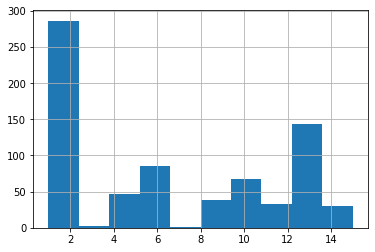

In [ ]:
df['Oncotree Code'].hist()

In [ ]:
mapping_oc = {
              3:  -1,
              12: -1,
              8: -1,
              7: -1,
              15: -1,
              } 

df.replace({'Oncotree Code': mapping_oc}, inplace=True)
df.info()

In [ ]:
df.info()

In [ ]:
df['Mutation Count'].hist()

In [ ]:
df['Mutation Count'].describe()

In [ ]:
df.head()

In [ ]:
df.to_csv(gdrive_project_root + 'data/processed/cancer_data_preprocessed.csv', index=False)